In [3]:
# To support both python 2 and 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np

# These two lines are required to use Tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# To plot nice figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Clear tensorflow's and reset seed
def reset_graph(seed=None):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
from sklearn.datasets import load_iris

# get dataset
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa

# visualise the data
axes = [0, 5, 0, 2]
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa") # =X[y==0, 0] where the y list value = 0 on the index and column 0
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

C:\Users\borin\AppData\Local\Temp/ipykernel_7052/1147427063.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa
Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "C:\Users\borin\anaconda3\envs\COMP322Wk4\lib\site-packages\debugpy\_vendored\pydevd\pydevd

KeyboardInterrupt: 

In [5]:
from sklearn.linear_model import Perceptron

# initialise and train a perceptron
pct = Perceptron(max_iter=100, random_state=None)
pct.fit(X, y)

Perceptron(max_iter=100, random_state=None)

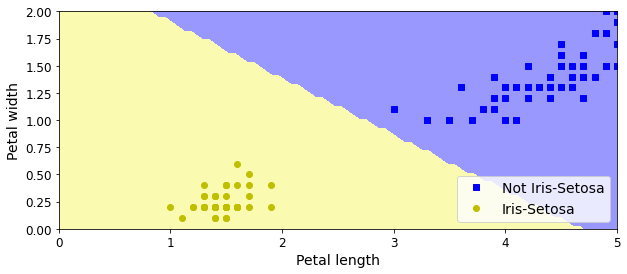

In [7]:
# sampling and predict the whole space of features
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 90).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 50).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = pct.predict(X_new)
zz = y_predict.reshape(x0.shape)

# plot the datapoints again
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

# get a nice color
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# plot the predicted samples of feature space
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

In [8]:
def heaviside(z): # modify this function. Hint: Use astype(z.dtype)
    return (z >=0).astype(z.dtype)

def logit(z): # modify this function. Hint: Use np.exp()
    return (1/(1+np.exp(-z)))

def relu(z): # modify this function. Hint: Use np.maximum()
    return np.maximum(0,z)

def leaky_relu(z, alpha=0.01): # modify this function and set default alpha to 0.01
    return np.maximum(alpha*z, z)

def elu(z, alpha=1): # No need to modify this function!
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, # No need to modify this function!
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

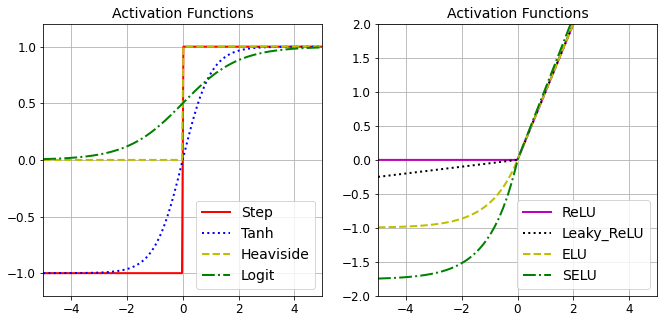

In [10]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,11))

plt.subplot(221)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, np.tanh(z), "b:", linewidth=2, label="Tanh")
plt.plot(z, heaviside(z), "y--", linewidth=2, label="Heaviside")
plt.plot(z, logit(z), "g-.", linewidth=2, label="Logit")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(222)
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU")
plt.plot(z, leaky_relu(z, 0.05), "k:", linewidth=2, label="Leaky_ReLU")
plt.plot(z, elu(z), "y--", linewidth=2, label="ELU")
plt.plot(z, selu(z), "g-.", linewidth=2, label="SELU")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -2, 2])

plt.show()

In [11]:
from sklearn.datasets import load_iris

# get dataset if you haven't
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa

C:\Users\borin\AppData\Local\Temp/ipykernel_10536/2923943317.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa


In [12]:
from sklearn.neural_network import MLPClassifier

# Initialise a multi-layer perceptron
mlp = MLPClassifier(max_iter=1, learning_rate_init=0.1, momentum = 0.8, random_state=None, warm_start=True, hidden_layer_sizes = 150, activation= 'tanh', solver = 'sgd')
mlp

MLPClassifier(activation='tanh', hidden_layer_sizes=150, learning_rate_init=0.1,
              max_iter=1, momentum=0.8, solver='sgd', warm_start=True)

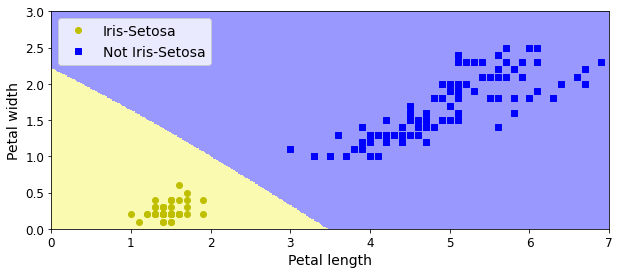

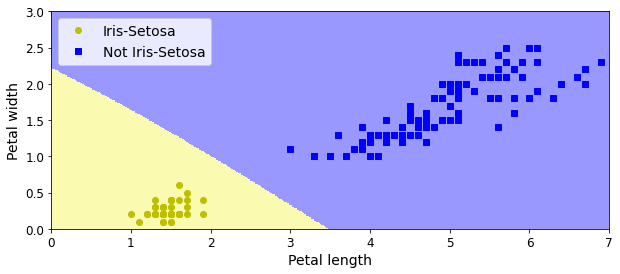

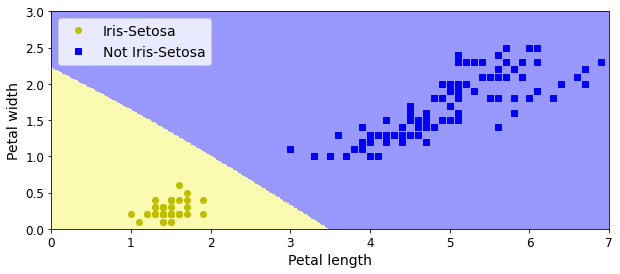

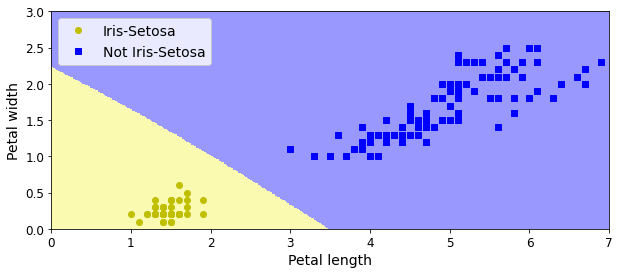

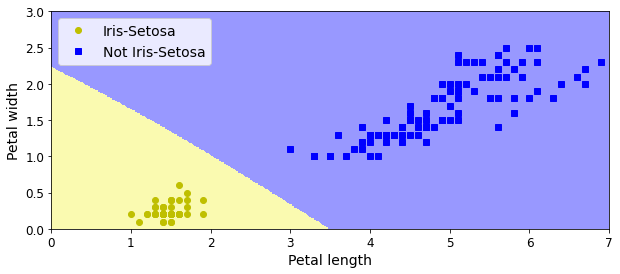

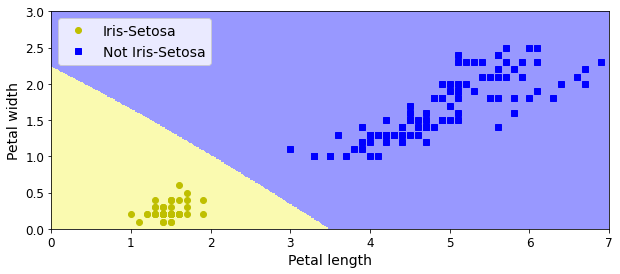

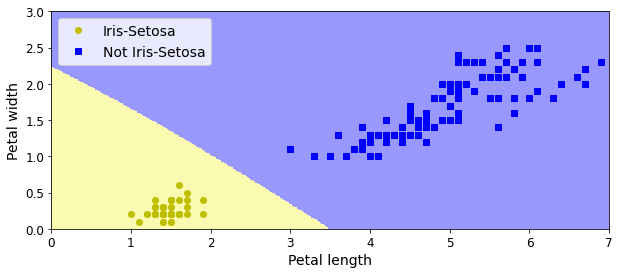

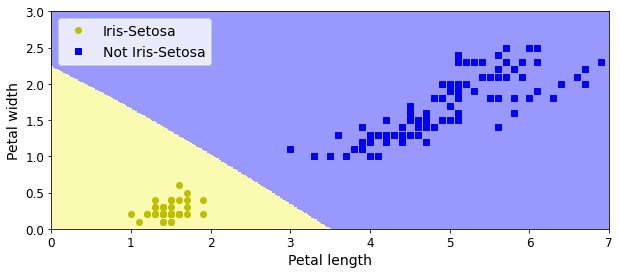

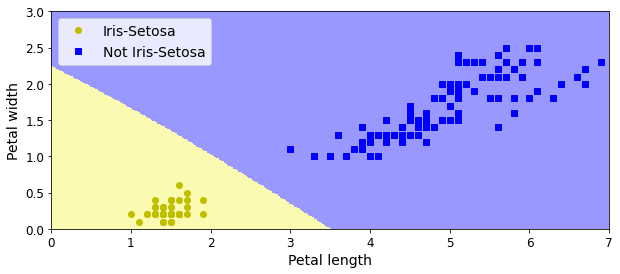

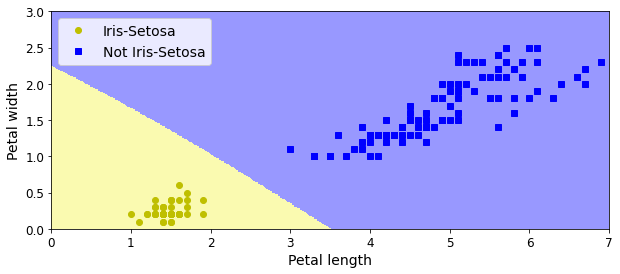

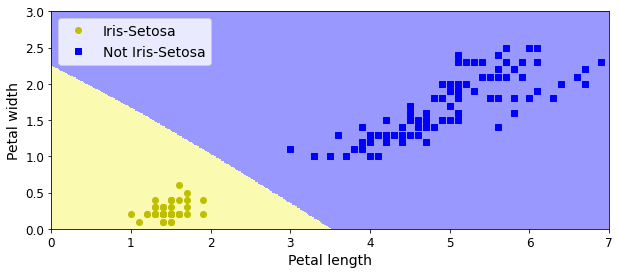

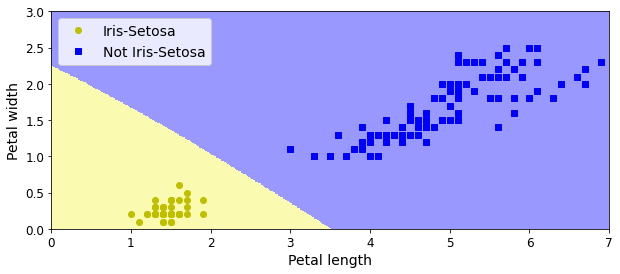

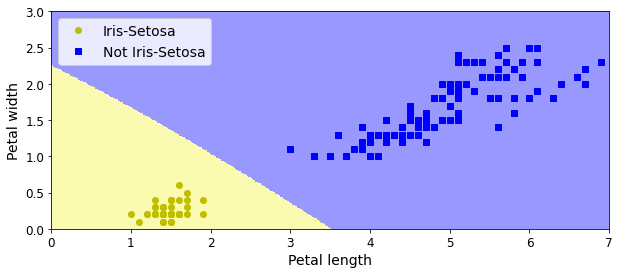

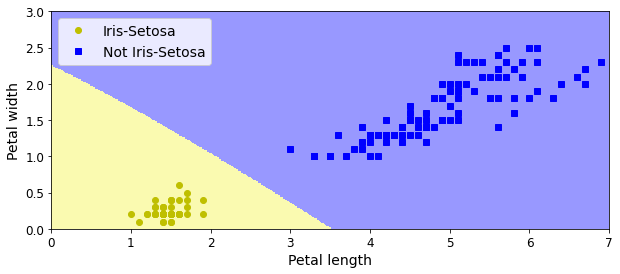

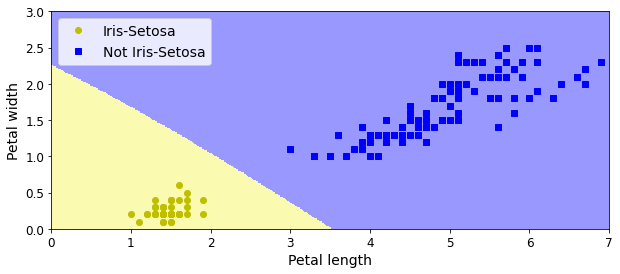

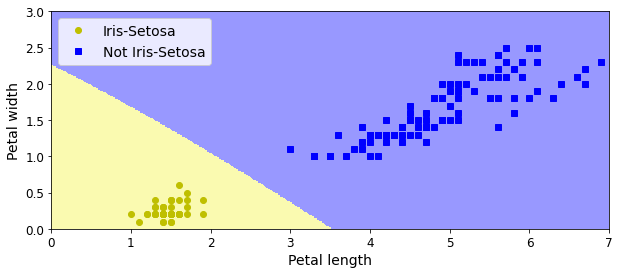

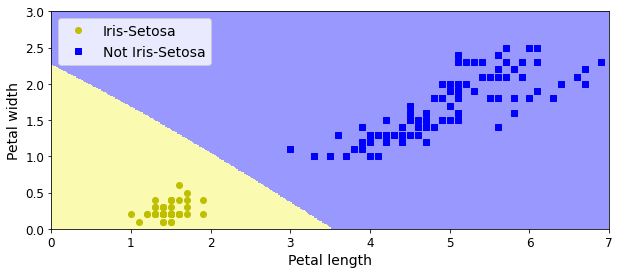

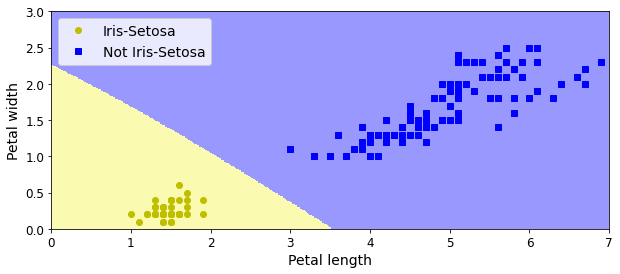

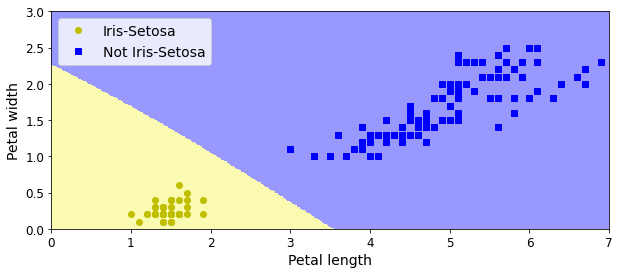

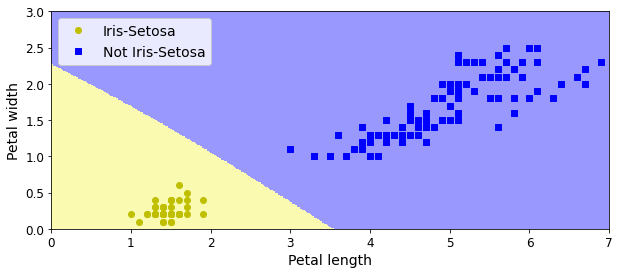

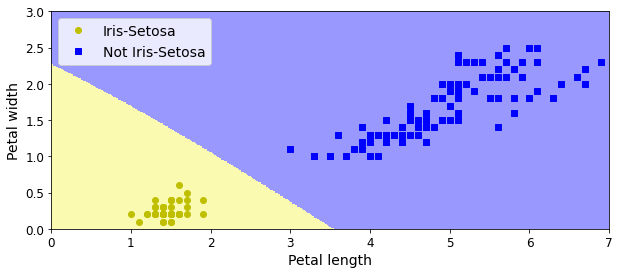

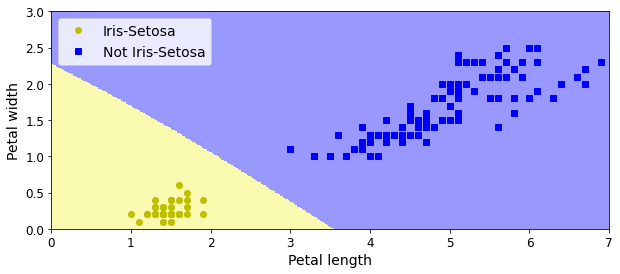

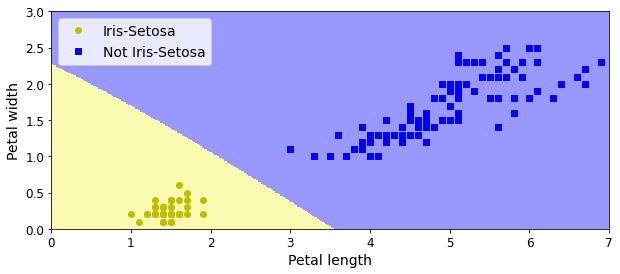

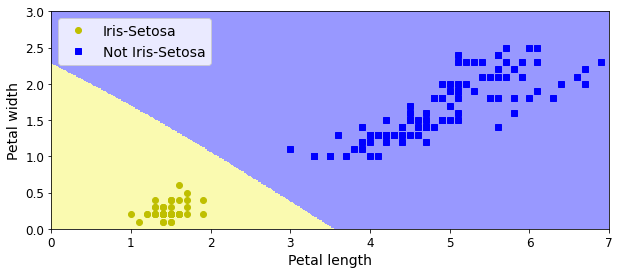

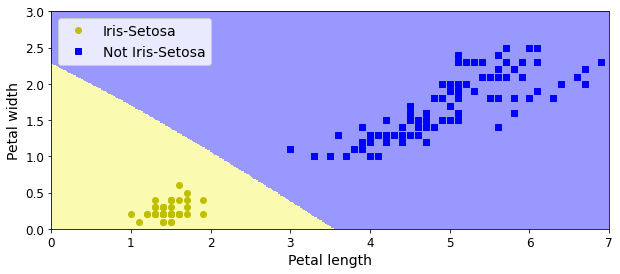

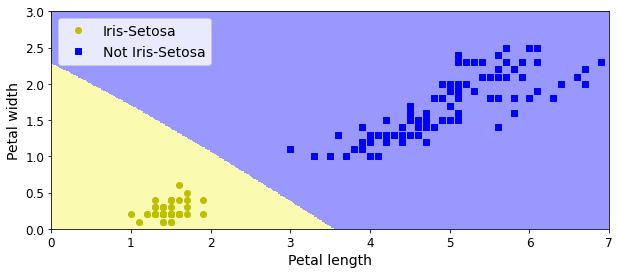

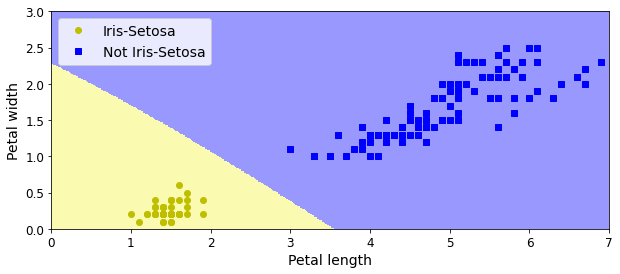

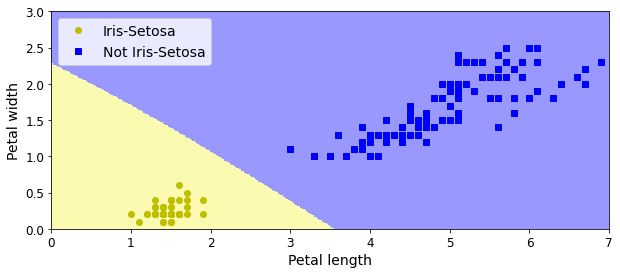

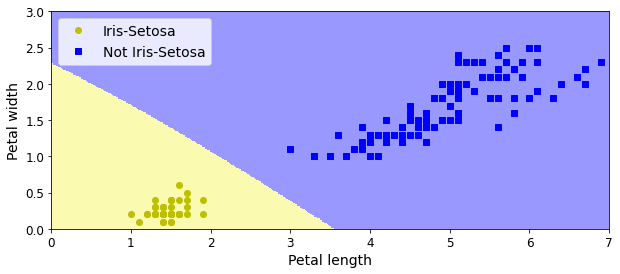

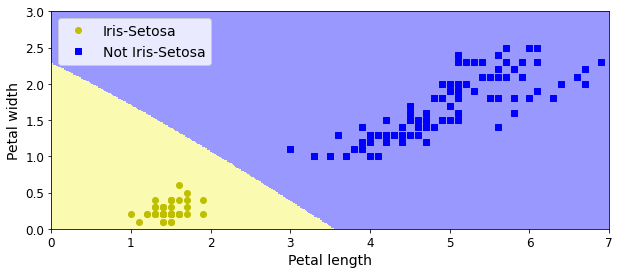

In [15]:
# Pre-define the axes for plotting
axes = [0, 7, 0, 3]

# Pre-generate a grid of sampling points
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 200).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Now, show the change after fitting epoch by epoch
for epochs in range(0,30):
    
    # Fit the model
    mlp.fit(X, y)
    
    # Plot the dataset
    plt.figure(figsize=(10, 4))
    plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    
    # Use to model to sampling predictions over all feature space
    y_predict = mlp.predict(np.c_[x0.ravel(), x1.ravel()])
    zz = y_predict.reshape(x0.shape)
    
    # get a nice color
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
    
    # Use contour plot again
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis(axes)
    plt.show()

In [16]:
# Load and use all digits in MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
digits = np.concatenate((X_train, X_test))
labels = np.concatenate((y_train, y_test))

# Pre-processing the data
t_digits = digits.astype(np.float32).reshape(-1, 28*28) / 255.0
t_labels = labels.astype(np.int32)

In [33]:
n_inputs = 28*28  # Total number of pixels in each MNIST's digit
n_hidden1 = 150 # Number of neurons in 1st hidden layer
n_hidden2 = 50 # Number of neurons in 2nd hidden layer
n_outputs = 10 # Number of neurons in output layer

reset_graph() # as we defined in the beginning of this notebook

# Create TensorFlow's placeholders for t_digits and t_labels
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# Define a function to create a layer of fully-connected neurons
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [34]:
# Construct MLP with two layers
hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.tanh)
hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.tanh)
logits = neuron_layer(hidden2, n_outputs, name="outputs")

# Or decomment below to use TensorFlow's premade instead of our function
#hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
#hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
#logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [39]:
# Use mean softmax cross entropy as a loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

# Use gradient descent to train MLP
#training_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
#tf.train.RMSPropOptimizer
#tf.train.AdamOptimizer()
training_op = tf.train.MomentumOptimizer(0.001, 2).minimize(loss)

# Define accuracy measure
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Initilise and run TensorFlow's computation graph of MLP
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(50):
        sess.run(training_op, feed_dict={X: t_digits, y: t_labels})
        acc_batch = accuracy.eval(feed_dict={X: t_digits, y: t_labels})
        print(epoch, "Accuracy:", acc_batch)
    
    # save the trained model
    save_path = tf.train.Saver().save(sess, "./trained_mnist_ann.ckpt")

0 Accuracy: 0.11294286
1 Accuracy: 0.114771426
2 Accuracy: 0.1195
3 Accuracy: 0.12952857
4 Accuracy: 0.14651428
5 Accuracy: 0.16194285
6 Accuracy: 0.18407142
7 Accuracy: 0.21588571
8 Accuracy: 0.21278572
9 Accuracy: 0.21642858
10 Accuracy: 0.21077143
11 Accuracy: 0.17485714
12 Accuracy: 0.088614285
13 Accuracy: 0.0718
14 Accuracy: 0.077842854
15 Accuracy: 0.097657144
16 Accuracy: 0.10758571
17 Accuracy: 0.11334286
18 Accuracy: 0.11584286
19 Accuracy: 0.11635714
20 Accuracy: 0.118114285
21 Accuracy: 0.118285716
22 Accuracy: 0.1187
23 Accuracy: 0.11872857
24 Accuracy: 0.11862857
25 Accuracy: 0.11838572
26 Accuracy: 0.11832857
27 Accuracy: 0.11837143
28 Accuracy: 0.11837143
29 Accuracy: 0.11837143
30 Accuracy: 0.11837143
31 Accuracy: 0.11837143
32 Accuracy: 0.11837143
33 Accuracy: 0.11837143
34 Accuracy: 0.11837143
35 Accuracy: 0.11837143
36 Accuracy: 0.11837143
37 Accuracy: 0.11837143
38 Accuracy: 0.11837143
39 Accuracy: 0.11837143
40 Accuracy: 0.11837143
41 Accuracy: 0.11837143
42 Accur

INFO:tensorflow:Restoring parameters from ./trained_mnist_ann.ckpt
Predicted class:  [1]
Actual class:  1


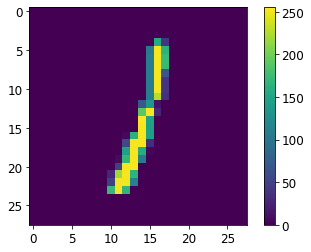

In [30]:
# random one digit
rnd_id = np.random.randint(0, len(digits))

# show the digit
plt.figure()
plt.imshow(digits[rnd_id])
plt.colorbar()
plt.grid(False)

# load the trained model and use to predict
with tf.Session() as sess:
    tf.train.Saver().restore(sess, "./trained_mnist_ann.ckpt")
    Z = logits.eval(feed_dict={X: t_digits[rnd_id].reshape(1, 28*28)})
    y_pred = np.argmax(Z, axis=1)
print("Predicted class: ", y_pred)
print("Actual class: ", labels[rnd_id])

In [40]:
# Load and use all digits in MNIST if you have directly jumped to this section
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
digits = np.concatenate((X_train, X_test))
labels = np.concatenate((y_train, y_test))

# Pre-processing the data
t_digits = digits.astype(np.float32).reshape(-1, 28*28) / 255.0
t_labels = labels.astype(np.int32)

# MNIST's specification
height = 28
width = 28
channels = 1

In [41]:
reset_graph() # as we defined in the beginning of this notebook

# Create TensorFlow's placeholders for digits and labels
X = tf.placeholder(tf.float32, shape=[None, height * width], name="X")
X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
y = tf.placeholder(tf.int32, shape=[None], name="y")

# Construct 2D convolutional layers
conv1 = tf.layers.conv2d(X_reshaped, filters=20, kernel_size=3, strides=1, 
                         padding="SAME", activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=40, kernel_size=3, strides=2, 
                         padding="SAME", activation=tf.nn.relu, name="conv2")

# Create a max pooling layer
pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
pool3_flat = tf.reshape(pool3, shape=[-1, 40 * 7 * 7])

# Followed by layer of fully-connected neurons
fc1 = tf.layers.dense(pool3_flat, 50, activation=tf.nn.relu, name="fc1")
logits = tf.layers.dense(fc1, 10, name="output")

# Use mean softmax cross entropy as a loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(xentropy)

# Use Adam Optimiser to train CNN 
training_op = tf.train.AdamOptimizer().minimize(loss, 
                                                aggregation_method=tf.AggregationMethod.EXPERIMENTAL_ACCUMULATE_N)
# (Change the aggregation_method to tf.AggregationMethod.EXPERIMENTAL_TREE or DEFAULT if it doesn't work)

# Define accuracy measure
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.


In [42]:
# Define a function to make training batches
# This is useful when your PC doesn't have much memory
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

# Train the CNN batch by batch
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(10):
        for X_batch, y_batch in shuffle_batch(t_digits, t_labels, 50): 
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: t_digits, y: t_labels})
        print(epoch, "Accuracy:", acc_batch)
    
    # save the trained model
    save_path = tf.train.Saver().save(sess, "./trained_mnist_cnn.ckpt")

0 Accuracy: 0.9837286
1 Accuracy: 0.98775715
2 Accuracy: 0.9902143
3 Accuracy: 0.98862857
4 Accuracy: 0.99575716
5 Accuracy: 0.9969714
6 Accuracy: 0.9976429
7 Accuracy: 0.9979857
8 Accuracy: 0.99415714
9 Accuracy: 0.99831426


INFO:tensorflow:Restoring parameters from ./trained_mnist_cnn.ckpt
Predicted class:  [3]
Actual class:  3


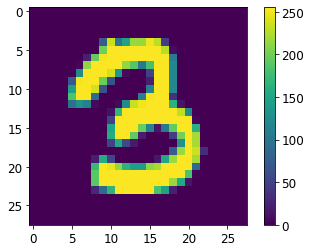

In [45]:
# random one digit for test CNN's prediction
rnd_id = np.random.randint(0, len(digits))

# visualise the digit
plt.figure()
plt.imshow(digits[rnd_id])
plt.colorbar()
plt.grid(False)

# load the trained model and use to predict
with tf.Session() as sess:
    tf.train.Saver().restore(sess, "./trained_mnist_cnn.ckpt")
    Z = logits.eval(feed_dict={X: t_digits[rnd_id].reshape(1, 28*28)})
    y_pred = np.argmax(Z, axis=1)

print("Predicted class: ", y_pred)
print("Actual class: ", labels[rnd_id])

In [46]:
# 4.1
# Reload the dataset again
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# Define and initialise functions similar to above again
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

# We will need to log performace at each interval to be able to stop training early
from datetime import datetime
def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)
logdir = log_dir("mnist_dnn")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

# Now we start training
m, n = X_train.shape
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.220% 	Loss: 0.36147
Epoch: 5 	Validation accuracy: 95.020% 	Loss: 0.18215
Epoch: 10 	Validation accuracy: 96.480% 	Loss: 0.13244
Epoch: 15 	Validation accuracy: 97.040% 	Loss: 0.11014
Epoch: 20 	Validation accuracy: 97.440% 	Loss: 0.09356
Epoch: 25 	Validation accuracy: 97.640% 	Loss: 0.08574
Epoch: 30 	Validation accuracy: 97.800% 	Loss: 0.07765
Epoch: 35 	Validation accuracy: 97.740% 	Loss: 0.07564
Epoch: 40 	Validation accuracy: 97.900% 	Loss: 0.07177
Epoch: 45 	Validation accuracy: 97.900% 	Loss: 0.06978
Epoch: 50 	Validation accuracy: 98.040% 	Loss: 0.07113
Epoch: 55 	Validation accuracy: 98.040% 	Loss: 0.06892
Epoch: 60 	Validation accuracy: 98.080% 	Loss: 0.06846
Epoch: 65 	Validation accuracy: 98.180% 	Loss: 0.06981
Epoch: 70 	Validation accuracy: 98.120% 	Loss: 0.06934
Epoch: 75 	Validation accuracy: 98.180% 	Loss: 0.06982
Epoch: 80 	Validation accuracy: 98.120% 	Loss: 0.06997
Epoch: 85 	Validation accuracy: 98.180% 	Loss: 0.07183
Epoch: 90 	V

In [47]:
# 4.2
# Just specify arguments kernel_regularizer when you call tf.layers.Conv2D() or tf.layers.Dense().
# Have a look at https://keras.io/regularizers/ for 3 types of 

# Or you can modify the loss function to incorporate regularization; e.g. tf.nn.l2_loss()
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
regularizer = tf.nn.l2_loss(weights)
loss = tf.reduce_mean(xentropy + beta * regularizer)

NameError: name 'weights' is not defined

In [ ]:
# 4.3
# Examples of using tf.layers.dropout()
dropout_rate = 0.5 #between 0 and 1
hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu, name="hidden1")
hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=True) #Need sto equal true for dropout to occur
hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation=tf.nn.relu, name="hidden2")
hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
logits = tf.layers.dense(hidden2_drop, n_outputs, name="outputs")

# It is similar to introduce another layers of network that will set input to zero sometime